In [11]:
import numpy as np
import pandas as pd
from statsbombpy import sb
from mplsoccer import VerticalPitch,Pitch

In [2]:
events_df = sb.competition_events(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")

In [3]:
frames_df = sb.competition_frames(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")

In [4]:
frames_df.rename(columns={'event_uuid': 'id'}, inplace = True)
df=pd.merge(frames_df, events_df,
how="left", on=["match_id","id"])

### Available Matches

In [5]:
matches_df = df[['match_id', 'team']].drop_duplicates()
matches_summary = matches_df.groupby('match_id')['team'].unique().reset_index()
matches_summary

,match_id,team
0,3895052,"[RB Leipzig, Bayer Leverkusen]"
1,3895060,"[Borussia Mönchengladbach, Bayer Leverkusen]"
2,3895067,"[Darmstadt 98, Bayer Leverkusen]"
3,3895074,"[Bayer Leverkusen, Bayern Munich]"
4,3895086,"[FC Heidenheim, Bayer Leverkusen]"
5,3895095,"[Bayer Leverkusen, FSV Mainz 05]"
6,3895107,"[FC Köln, Bayer Leverkusen]"
7,3895113,"[Bayer Leverkusen, Wolfsburg]"
8,3895121,"[Bayer Leverkusen, Freiburg]"
9,3895134,"[Hoffenheim, Bayer Leverkusen]"


### Match Chosen - Bayer Munich vs Bayer Leverkusen

In [6]:
df = df[df['match_id'] == 3895232]

View all successful passes for Florian Wirtz

In [9]:
passes = df[
    (df['type'] == 'Pass') &
    (df['team'] == 'Bayer Leverkusen') &
    (df['player'] == 'Florian Wirtz') &
    (df['pass_outcome'].isnull())
].copy()

In [10]:
passes[['x', 'y']] = passes['location_x'].apply(pd.Series)
passes[['end_x', 'end_y']] = passes['pass_end_location'].apply(pd.Series)

In [14]:
# Passes distances:
passes['distance'] = np.sqrt((passes['end_x'] - passes['x'])**2 + (passes['end_y'] - passes['y'])**2)
passes['progressive'] = passes['end_x'] > passes['x']

Total de passes certos do Wirtz: 686
Média de distância dos passes: 21.26 metros
Percentual de passes progressivos: 57.3%


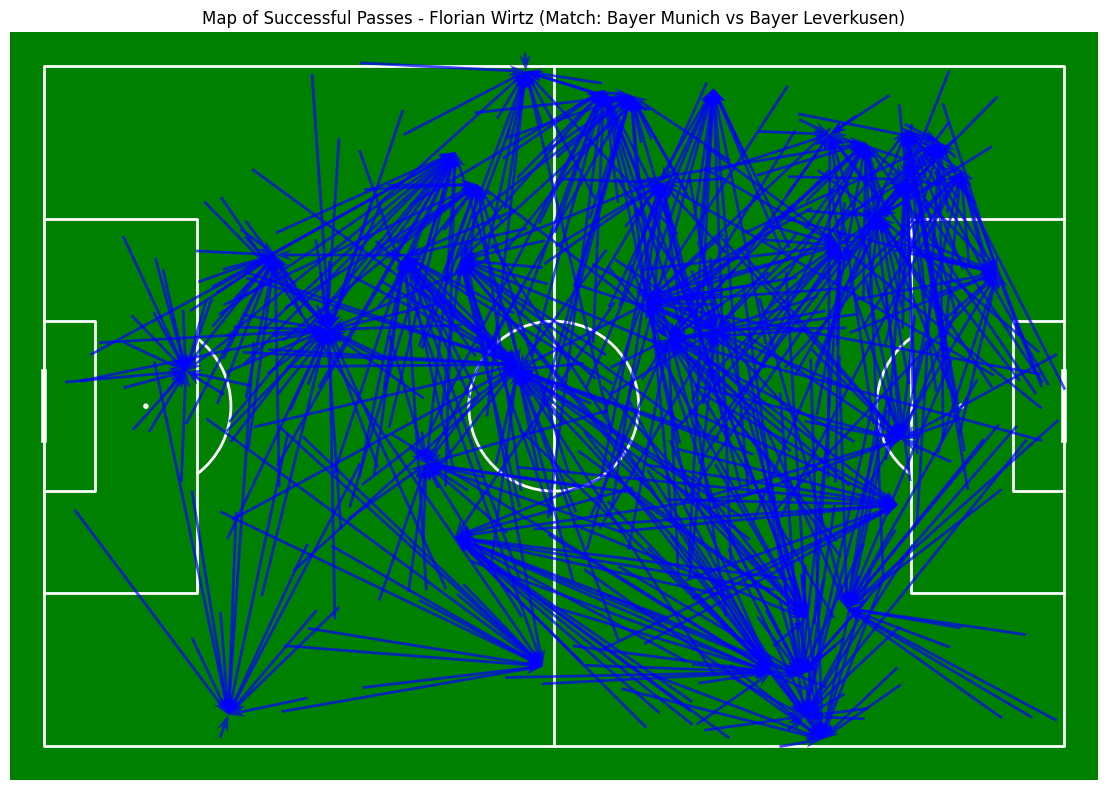

In [19]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white')
fig, ax = pitch.draw(figsize=(12, 8))
pitch.arrows(
    passes['x'], passes['y'],
    passes['end_x'], passes['end_y'],
    ax=ax, color='blue', width=2, headwidth=4, headlength=6, alpha=0.7
)

ax.set_title('Map of Successful Passes - Florian Wirtz (Match: Bayer Munich vs Bayer Leverkusen)', fontsize=12)

# Exibir algumas estatísticas no console
print(f'Total de passes certos do Wirtz: {len(passes)}')
print(f'Média de distância dos passes: {passes["distance"].mean():.2f} metros')
print(f'Percentual de passes progressivos: {passes["progressive"].mean()*100:.1f}%')

fig.tight_layout()

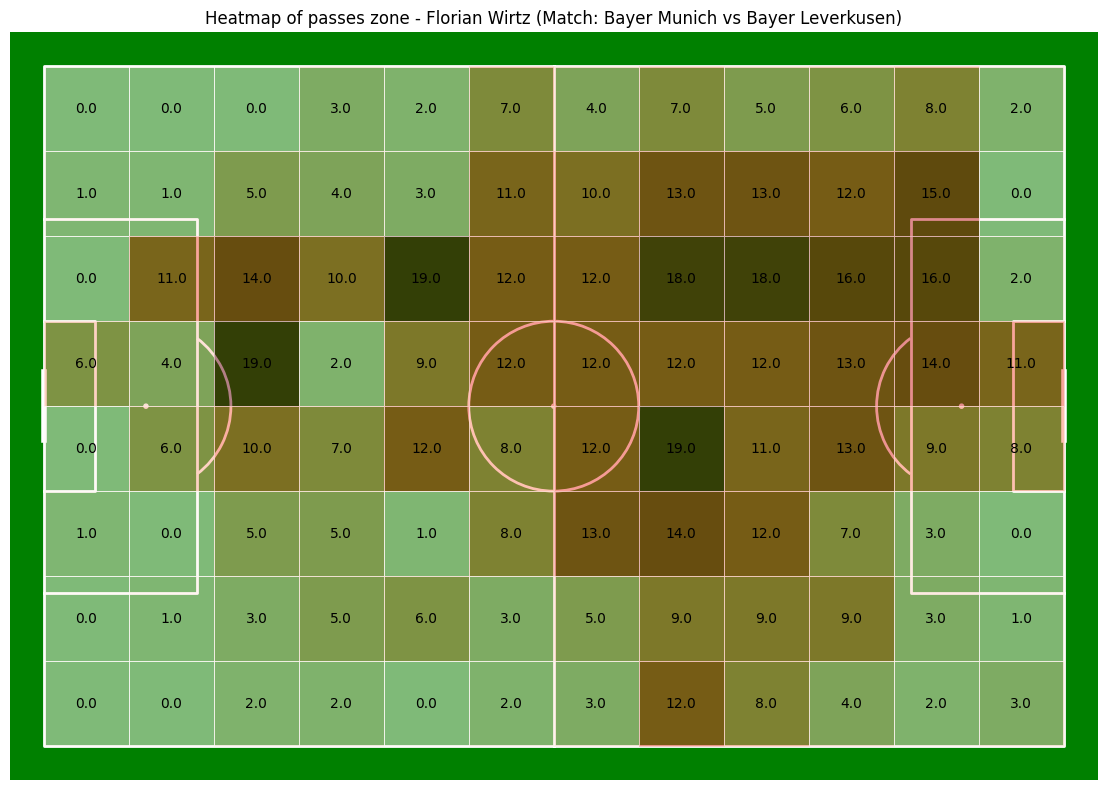

In [29]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white')
fig, ax = pitch.draw(figsize=(12, 8))

bin_statistic = pitch.bin_statistic(passes['x'], passes['y'], statistic='count', bins=(12, 8))

pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', alpha=0.5, edgecolor='white', linewidth=0.5)

pitch.label_heatmap(bin_statistic, ax=ax, color='black', fontsize=10, ha='center')

ax.set_title('Heatmap of passes zone - Florian Wirtz (Match: Bayer Munich vs Bayer Leverkusen)', fontsize=12)

fig.tight_layout()